In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

import glob
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io

df = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Label_Crawl_VnExpress.csv')
df1 = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Label_Crawl_DanTri.csv')
df2 = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Label_Crawl_ThanhNien.csv')
df2b = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Label_Crawl_ThanhNien_new.csv')
df2 = pd.concat([df2, df2b], ignore_index=True)
df3 = pd.concat([df, df1], ignore_index=True)
df3 = pd.concat([df3, df2], ignore_index=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Clean_data_VnExpress.csv')
df1 = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Clean_data_DanTri.csv')
df2 = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Clean_data_ThanhNien.csv')
df3 = pd.read_csv('/content/drive/MyDrive/HMTK_Dataset/Clean_data_Full.csv')

In [ ]:
X_VNXP=df.drop('Topic', axis=1).copy()
y_VNXP=df['Topic'].copy()

X_DT=df1.drop('Topic', axis=1).copy()
y_DT=df1['Topic'].copy()

X_TN=df2.drop('Topic', axis=1).copy()
y_TN=df2['Topic'].copy()

X_All=df3.drop('Topic', axis=1).copy()
y_All=df3['Topic'].copy()

In [ ]:
labels = df3['Topic'].unique()
labels

array(['Thời sự', 'Kinh doanh', 'Bất động sản', 'Khoa học và công nghệ',
       'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe'], dtype=object)

In [ ]:
VNXP_Bat_dong_san = np.count_nonzero(y_VNXP == 'Bất động sản')
VNXP_Giao_duc = np.count_nonzero(y_VNXP == 'Giáo dục')
VNXP_Giai_tri = np.count_nonzero(y_VNXP == 'Giải trí')
VNXP_Khoa_hoc = np.count_nonzero(y_VNXP == 'Khoa học và công nghệ')
VNXP_Kinh_doanh = np.count_nonzero(y_VNXP == 'Kinh doanh')
VNXP_Suc_khoe = np.count_nonzero(y_VNXP == 'Sức khỏe')
VNXP_The_thao = np.count_nonzero(y_VNXP == 'Thể thao')
VNXP_Thoi_su = np.count_nonzero(y_VNXP == 'Thời sự')

DT_Bat_dong_san = np.count_nonzero(y_DT == 'Bất động sản')
DT_Giao_duc = np.count_nonzero(y_DT == 'Giáo dục')
DT_Giai_tri = np.count_nonzero(y_DT == 'Giải trí')
DT_Khoa_hoc = np.count_nonzero(y_DT == 'Khoa học và công nghệ')
DT_Kinh_doanh = np.count_nonzero(y_DT == 'Kinh doanh')
DT_Suc_khoe = np.count_nonzero(y_DT == 'Sức khỏe')
DT_The_thao = np.count_nonzero(y_DT == 'Thể thao')
DT_Thoi_su = np.count_nonzero(y_DT == 'Thời sự')

TN_Bat_dong_san = np.count_nonzero(y_TN == 'Bất động sản')
TN_Giao_duc = np.count_nonzero(y_TN == 'Giáo dục')
TN_Giai_tri = np.count_nonzero(y_TN == 'Giải trí')
TN_Khoa_hoc = np.count_nonzero(y_TN == 'Khoa học và công nghệ')
TN_Kinh_doanh = np.count_nonzero(y_TN == 'Kinh doanh')
TN_Suc_khoe = np.count_nonzero(y_TN == 'Sức khỏe')
TN_The_thao = np.count_nonzero(y_TN == 'Thể thao')
TN_Thoi_su = np.count_nonzero(y_TN == 'Thời sự')

All_Bat_dong_san = np.count_nonzero(y_All == 'Bất động sản')
All_Giao_duc = np.count_nonzero(y_All == 'Giáo dục')
All_Giai_tri = np.count_nonzero(y_All == 'Giải trí')
All_Khoa_hoc = np.count_nonzero(y_All == 'Khoa học và công nghệ')
All_Kinh_doanh = np.count_nonzero(y_All == 'Kinh doanh')
All_Suc_khoe = np.count_nonzero(y_All == 'Sức khỏe')
All_The_thao = np.count_nonzero(y_All == 'Thể thao')
All_Thoi_su = np.count_nonzero(y_All == 'Thời sự')

VNXP_count = np.count_nonzero(y_VNXP)
DT_count = np.count_nonzero(y_DT)
TN_count = np.count_nonzero(y_TN)

In [ ]:
All_Bat_dong_san

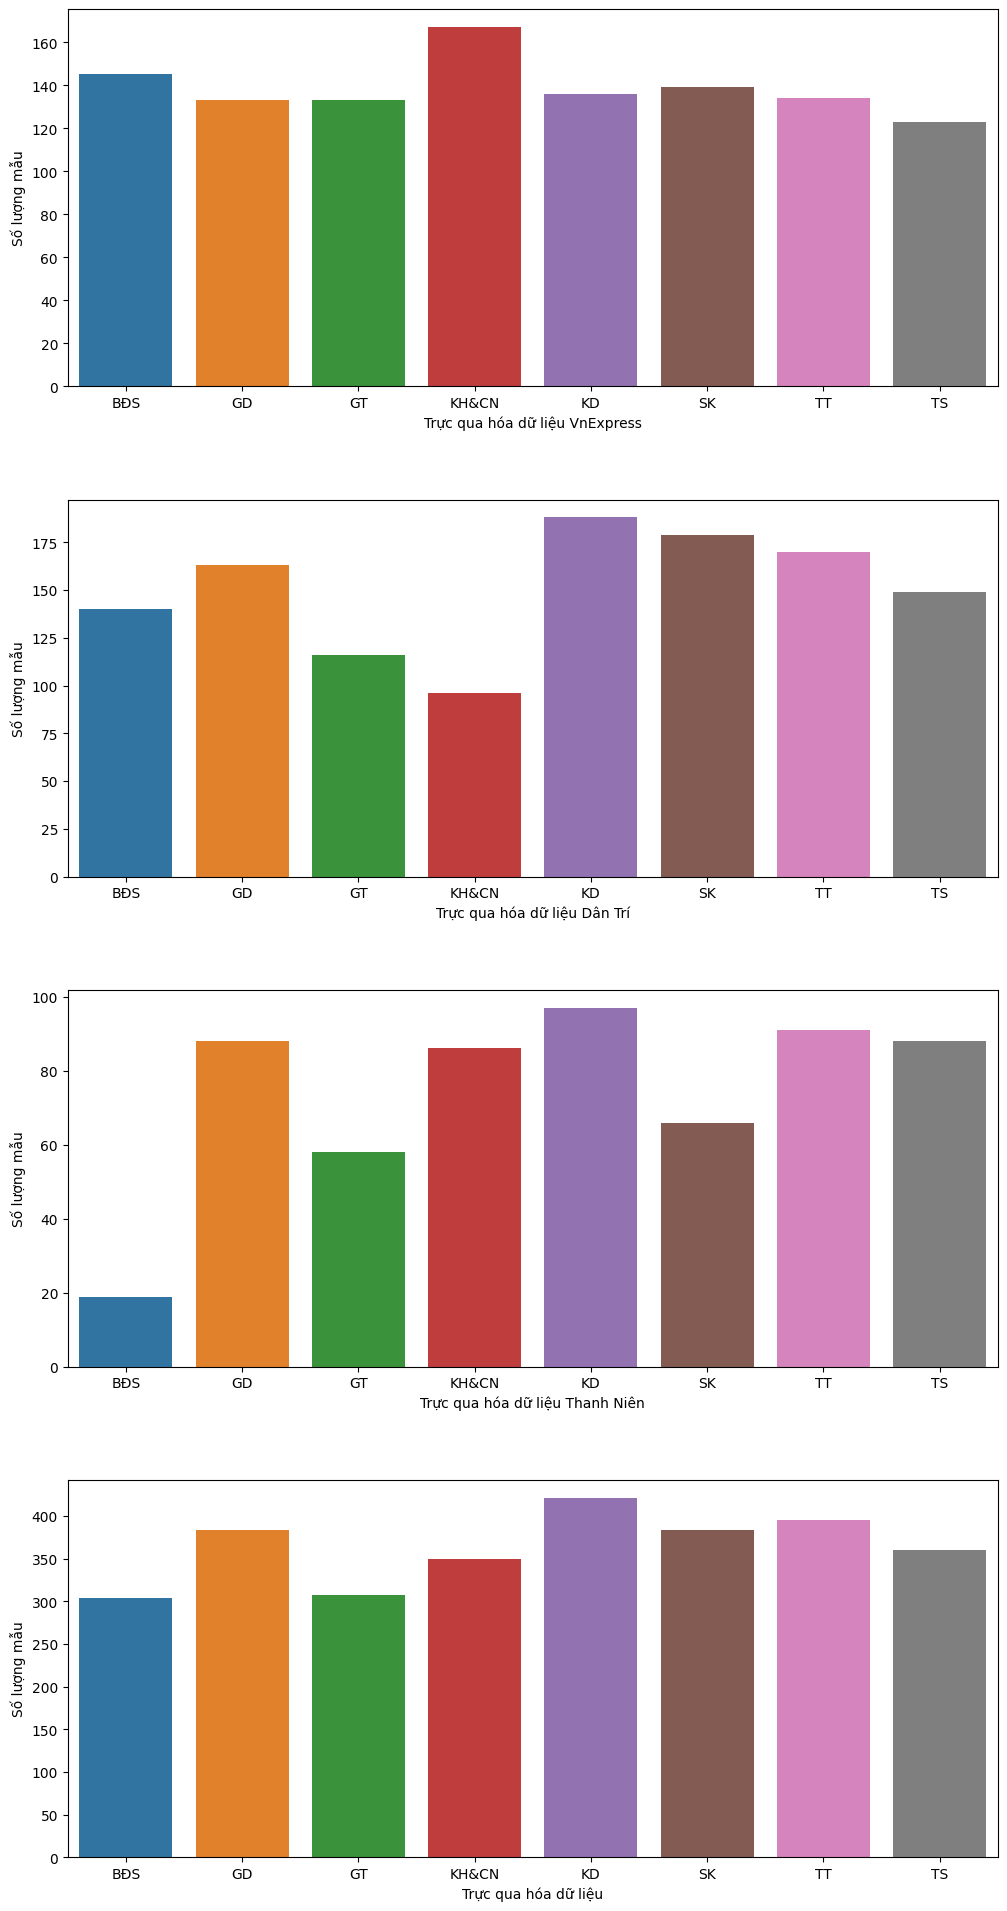

In [ ]:
import math

classes = ['BĐS', 'GD', 'GT', 'KH&CN', 'KD', 'SK', 'TT', 'TS']
VNXP = [VNXP_Bat_dong_san, VNXP_Giao_duc, VNXP_Giai_tri, VNXP_Khoa_hoc, VNXP_Kinh_doanh, VNXP_Suc_khoe, VNXP_The_thao, VNXP_Thoi_su]
DT = [DT_Bat_dong_san, DT_Giao_duc, DT_Giai_tri, DT_Khoa_hoc, DT_Kinh_doanh, DT_Suc_khoe, DT_The_thao, DT_Thoi_su]
TN = [TN_Bat_dong_san, TN_Giao_duc, TN_Giai_tri, TN_Khoa_hoc, TN_Kinh_doanh, TN_Suc_khoe, TN_The_thao, TN_Thoi_su]
All = [All_Bat_dong_san, All_Giao_duc, All_Giai_tri, All_Khoa_hoc, All_Kinh_doanh, All_Suc_khoe, All_The_thao, All_Thoi_su]

VNXP_df = pd.DataFrame({'Chủ đề': classes, 'Số lượng mẫu': VNXP})
DT_df = pd.DataFrame({'Chủ đề': classes, 'Số lượng mẫu': DT})
TN_df = pd.DataFrame({'Chủ đề': classes, 'Số lượng mẫu': TN})
All_df = pd.DataFrame({'Chủ đề': classes, 'Số lượng mẫu': All})

fig, axes = plt.subplots(4, 1, figsize=(12, 24))
plt.subplots_adjust(hspace=0.3)
sns.barplot(x='Chủ đề', y='Số lượng mẫu', data=VNXP_df, ax=axes[0])
axes[0].set_xlabel('Trực qua hóa dữ liệu VnExpress')

sns.barplot(x='Chủ đề', y='Số lượng mẫu', data=DT_df, ax=axes[1])
axes[1].set_xlabel('Trực qua hóa dữ liệu Dân Trí')

sns.barplot(x='Chủ đề', y='Số lượng mẫu', data=TN_df, ax=axes[2])
axes[2].set_xlabel('Trực qua hóa dữ liệu Thanh Niên')

sns.barplot(x='Chủ đề', y='Số lượng mẫu', data=All_df, ax=axes[3])
axes[3].set_xlabel('Trực qua hóa dữ liệu')

plt.show()

In [ ]:
from sklearn.utils import resample
counts = df3['Topic'].value_counts()

min_count = min(counts)

df3 = pd.concat([
    resample(df3[df3['Topic'] == label], replace=False, n_samples=min_count, random_state=42)
    for label in counts.index
])

print(df3['Topic'].value_counts())

In [ ]:
path = '/content/drive/MyDrive/HocMayThongKe_TH'
df3.to_csv(path+'/dataset.csv', index=True)

In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv(path+'/dataset.csv')
X = data['title'] + '. ' + data['Des']
y = data['Topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
X

0       Vốn vẫn khó đến với doanh nghiệp, người dân. H...
1       Thẻ tinh hoa cho khách VIP của Ngân hàng BIDV....
2       Siết phân lô, đất nền liệu có tăng giá, . Luật...
3       Ông lớn xăng dầu Xuyên Việt Oil nợ thuế hơn 1....
4       OpenAI có CEO mới. Cuộc đàm phán giữa hội đồng...
                              ...                        
2427    Người Hà Nội mất 132 năm để mua nhà, quy định ...
2428    Startup xây nhà bằng đất. Morocco Kết hợp truy...
2429    90% giỏ hàng The Privia đợt 1 giao dịch thành ...
2430    Tiềm năng phát triển bất động sản, dịch vụ du ...
2431    Cổ phiếu Evergrande tăng vọt. Cổ phiếu hãng đị...
Length: 2432, dtype: object

In [ ]:
X_train.to_csv(path+'/dataset/train/data.csv', index=True)
y_train.to_csv(path+'/dataset/train/label.csv', index=True)
X_test.to_csv(path+'/dataset/test/data.csv', index=True)
y_test.to_csv(path+'/dataset/test/label.csv', index=True)

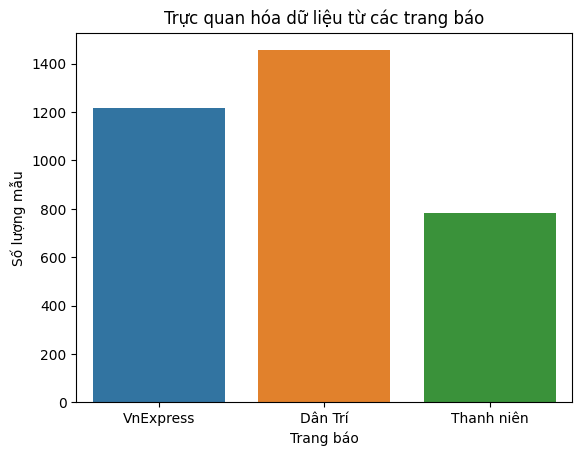

In [ ]:
labels = ['VnExpress', 'Dân Trí', 'Thanh niên']
All_Samples = [VNXP_count, DT_count, TN_count]

sns.barplot(x=labels, y=All_Samples)
plt.xlabel('Trang báo')
plt.ylabel('Số lượng mẫu')
plt.title('Trực quan hóa dữ liệu từ các trang báo')
plt.show()

In [ ]:
All_Samples

[1216, 1456, 783]